## BA 545 Course Project 2: Machine Team 4 
#### Online Shoppers Purchasing Intentions
##### Michael Disanto, Dawn Massey PhD CPA CGMA, Brian Nicholls
###### Initial Base Model (2) - Spring 2020
----------------------------------------------------------------------


### **Table of Contents:**

0. [Preparing for analyisis](#part2.0)
1. [Initial review and vizualization of the data](#part2.1)
2. [Process the data for Initial Data Models](#part2.2)
3. [Split and run the initial model with all features](#part2.3)



## 0. Preparing for Analysis  <a name="part2.0"></a>
####  Import the necesary packages for reading, analyzing, tidying, modeling, & evaluating the data

In [1]:
# # TO USE FOR ENTIRE TEAM
# import pandas as pd
# import numpy as np
# from pandas_profiling import ProfileReport
# import statsmodels.api as sm
# from scipy import stats
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

In [2]:
# Excluding Items not in Fairfield Jupiter Lab
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

In [3]:
# Processing the data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler().fit(X_train) >>> standardized_X = scaler.transform(X_train) >>> standardized_X_test = scaler.transform(X_test)

from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X_train) >>> normalized_X = scaler.transform(X_train) >>> normalized_X_test = scaler.transform(X_test)

from sklearn.preprocessing import Binarizer 
# binarizer = Binarizer(threshold=0.0).fit(X) >>> binary_X = binarizer.transform(X)

# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)

# Imputation
from sklearn.impute import (SimpleImputer, KNNImputer, MissingIndicator)
from sklearn.experimental import enable_iterative_imputer
# imp = Imputer(missing_values=0, strategy='mean', axis=0) >>> imp.fit_transform(X_train)
from sklearn.preprocessing import PolynomialFeatures 
# poly = PolynomialFeatures(5) >>> poly.fit_transform(X)

# Train/Test Split
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


# Various Models
from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=3, random_state=0

from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)

from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()

from sklearn.linear_model import RidgeCV
# rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()

from sklearn.svm import SVC 
# svc = SVC(kernel='linear')

from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize=True)

from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(n_neighbors=5)

## Fit the model
# # Supervised learning
# lr.fit(X, y)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)   

# #Unsupervised Learning 
# k_means.fit(X_train) 
# pca_model = pca.fit_transform(X_train)

## Predict Y
# Supervised Estimators
# y_pred = svc.predict(np.random.random((2,5))) 
# y_pred = lr.predict(X_test)
# y_pred = knn.predict_proba(X_test)   
# Unsupervised Estimators 
# y_pred = k_means.predict(X_test)


# Packages to evaluate Model Performance (Classification)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
# print(classification_report(y_test_log, y_pred_log))

# Packages to evaluate Model Performance (Linear)
from sklearn.metrics import mean_absolute_error 
# y_true = [3, -0.5, 2] >>> mean_absolute_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score 
# r2_score(y_true, y_pred)

#from sklearn.cross_validation import cross_val_score 
# print(cross_val_score(knn, X_train, y_train, cv=4)) >>> print(cross_val_score(lr, X, y, cv=2)

# Packages for Over/Under Sampling
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import NearMiss 

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

# 1. Initial Review and Vizualization of the Data  <a name="part2.1"></a>

In [4]:
# Pull in our original data and a copy for the base model
df = pd.read_csv('online_shoppers_intention.csv', na_values=r'-')
df_base = df.copy()

In [5]:
# Verify that the datatypes have change based on encoding
display(df_base.info())
display(df_base.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

None

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


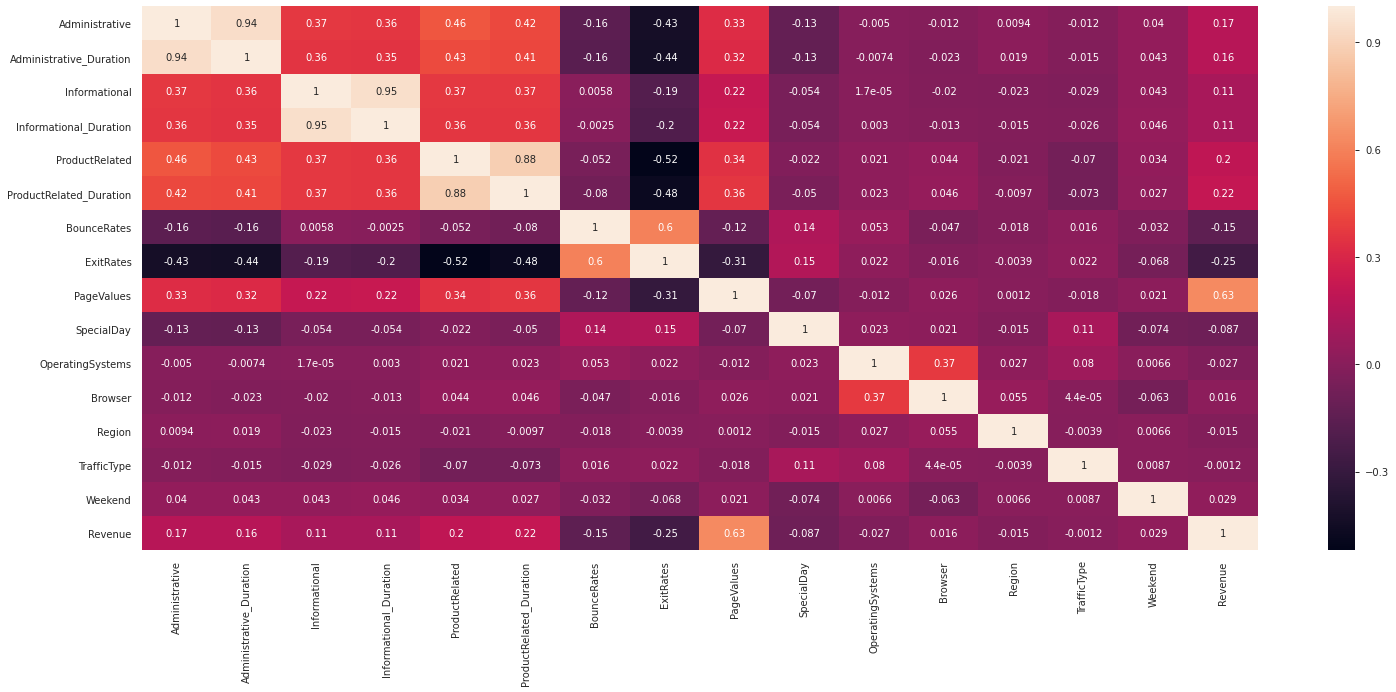

In [6]:
# Correlation Heatmap for the dataframe
spearman =df.corr(method ='spearman')
plt.figure(figsize=(25,10))
sns.heatmap(spearman, annot=True)

# 2. Process the Data for Initial Data Models  <a name="part2.2"></a>

    2.0 Pipeline [Prep] - Create subsets and list to be used later in the pipeline:

In [7]:
# Create Continuous Variable List
df_continuous = df.iloc[:,:9]
continuous_df_list = df_continuous.columns.tolist()

#Create Categorical Variable List
df_categorical = df.iloc[:,9:-1]
categorical_df_list = df_categorical.columns.tolist()


    2.1 Pipeline [Impute] - Initial Imputation of Categorical Features:

In [8]:
# Pipeline - Initial Imputation of Categorical Feature (VisitorType):

## Replace the VisitorType 'Other' with the variable's mode, namely: 'Returning_Visitor'
df['VisitorType'] = df['VisitorType'].replace('Other','Returning_Visitor')
df.groupby('VisitorType').count()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
VisitorType,,,,,,,,,,,,,,,,,
New_Visitor,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694
Returning_Visitor,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636


In [9]:
# Encode Categorical Features (VisitorType, Weekend) & Target (Revenue)

enc = LabelEncoder()

df['VisitorType'] = enc.fit_transform(df['VisitorType'])
df['Weekend'] = enc.fit_transform(df['Weekend'])
df['Revenue'] = enc.fit_transform(df['Revenue'])

In [10]:
# Bin Categorical Features (Month, OperatingSystems, Browser, Region, TrafficType):

##Reduce months to two holiday bins - one for the months with holidays (Feb and May)and the other for all other months
def holiday_bin_func(month) :
    if month == 'May':
        return int(1)
    elif month == 'Feb':
        return int(1)
    else:
        return int(0)
    
df['Holiday_Bin'] = df['Month'].apply(holiday_bin_func)

##Reduce months to the top 4 in which there are transactions and "other"
def month_bin_func(month) :
    if month == 'May':
        return int(5)
    elif month == 'Nov':
        return int(11)
    elif month == 'Mar':
        return int(3)
    elif month == 'Dec':
        return int(12)
    else:
        return int(0)
    
df['Month_Bin'] = df['Month'].apply(month_bin_func)


##Encode month names to numerical representations
def month_func(month) :
    if month == 'Jan':
        return int(1)
    elif month == 'Feb':
        return int(2)
    elif month == 'Mar':
        return int(3)
    elif month == 'Apr':
        return int(4)
    elif month == 'May':
        return int(5)
    elif month == 'June':
        return int(6)
    elif month == 'Jul':
        return int(7)
    elif month == 'Aug':
        return int(8)
    elif month == 'Sep':
        return int(9)
    elif month == 'Oct':
        return int(10)
    elif month == 'Nov':
        return int(11)
    elif month == 'Dec':
        return int(12)

df['Month'] = df['Month'].apply(month_func)

##Bin months into quarters
def month_quarterly_func(month) :
    if month <= 3:
        return int(1)
    elif month >= 4 and month <= 6:
        return int(2)
    elif month >= 7 and month <= 9:
        return int(3)
    elif month >= 10 and month <= 12:
        return int(4)

df['Quarter'] = df['Month'].apply(month_quarterly_func)

##Reduce categories for Operating Systems to the top 3 plus "other"
### Operating Systems – is a categorical variable and most of the data (~95%) is in one of three operating systems (2, 1, 3). 
def binning_operating_systems(B):
    if (B <= 3):
        return(B)
    else:
        return(4) # creating a category of 4 for all Operating Systems > 3

df['OperatingSystems_Bin']=df['OperatingSystems'].apply(binning_operating_systems)   # Creating a new column in the df


      
##Reduce categories for Browser to the top 3 plus "other"
### Browser – is a categorical variable and most the data (~91%) come from three browsers (2, 1, 4).
def binning_browser(B):
    if (B == 3) or (B > 4): 
        return(3) # uses a category of 3 for browser 3 and browsers 5 and up
    else:
        return(B) 

df['Browser_Bin']=df['Browser'].apply(binning_browser)   # Creating a new column in the df
      
      
##Reduce categories for Region to the top 4 plus "other"
### Region – is a categorical variable for region from which the visitor came. The top four account for ~77% of the data (i.e., region 1, 3, 4, 2).
def binning_region(B):
    if (B <= 4):
        return(B)
    else:
        return(5) # creating a category of 5 for all Regions > 4

df['Region_Bin']=df['Region'].apply(binning_region)   # Creating a new column in the df

      
##Reduce categories for TrafficType to the top 3 plus "other"
### TrafficType – is a categorical variable to indicate how visitor arrived at website. The top three account for approximately 67% of the referrals (i.e., types 2, 1, 3).
def binning_traffic_type(B):
    if (B <= 3):
        return(B)
    else:
        return(4) # creating a category of 4 for all Traffic Types > 3

df['TrafficType_Bin']=df['TrafficType'].apply(binning_traffic_type)   # Creating a new column in the df

In [11]:
# Add created features/bins to categorical list

##Create added features list
added_categorical_features = df.iloc[:,-7:]
added_categorical_list = added_categorical_features.columns.tolist()

##Combine added features list with categorical list
categorical_df_list = categorical_df_list + added_categorical_list

##Check work by printing combined categorical list
categorical_df_list

['SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Holiday_Bin',
 'Month_Bin',
 'Quarter',
 'OperatingSystems_Bin',
 'Browser_Bin',
 'Region_Bin',
 'TrafficType_Bin']

    2.2 Pipeline [Transform] - Initial Log Transformation Continuous Features:

In [12]:
# Initial Log Transformation Continuous Features

# Impute Zeros to one (by adding one to all values) before applying the log transformation
for column in continuous_df_list:
    df[column] = df[column] + 1

display(df[continuous_df_list].sample(20))

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
11704,1,1.000000,1,1.000000,77,1554.269048,1.000000,1.009586,1.000000
2407,1,1.000000,1,1.000000,54,716.500000,1.022642,1.036298,1.000000
2683,1,1.000000,1,1.000000,1,1.000000,1.200000,1.200000,1.000000
6675,5,81.600000,1,1.000000,40,640.493333,1.000000,1.005000,1.000000
4105,16,642.535714,4,299.666667,14,799.535714,1.000000,1.011594,1.000000
328,4,54.166667,1,1.000000,12,264.600000,1.000000,1.003571,1.000000
10280,3,168.888889,3,826.500000,118,5257.472341,1.004030,1.014604,4.187495
6944,6,40.700000,1,1.000000,15,254.600000,1.000000,1.018333,1.000000
1979,8,170.500000,1,1.000000,22,485.950000,1.008696,1.037681,1.000000
7462,2,46.400000,1,1.000000,16,115.900000,1.000000,1.025000,1.000000


    2.3 Pipeline [Calcualated Features] - Initial Feature Engineering for Continuous Features:

In [13]:

df['PageValues_Log'] = np.log(df['PageValues'])

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Admin_per_Exit'] = df['Administrative'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_Bounce'] = df['Administrative'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_Exit'] = df['Administrative_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_Bounce'] = df['Administrative_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Info_per_Exit'] = df['Informational'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_per_Bounce'] = df['Informational'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_dur_per_Exit'] = df['Informational_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_dur_per_Bounce'] = df['Informational_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Product_per_Exit'] = df['ProductRelated'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_per_Bounce'] = df['ProductRelated'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_dur_per_Exit'] = df['ProductRelated_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_dur_per_Bounce'] = df['ProductRelated_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'

#Create 'Bounce_Exit_Rate_Avg' to enable us to retain two highly correlated variables (i.e., 'BounceRates' and 'ExitRates') since both are highly correlated with the target
df['Bounce_Exit_Rate_Avg'] = (df['BounceRates'] + df['ExitRates'])/2
df['Bounce_Exit_Rate_WeightedAvg'] = ((df['BounceRates']*.6) + (df['ExitRates']*.4))
df['Bounce_Exit_Rate_Avg_PageVales'] = (df['Bounce_Exit_Rate_Avg'] / df['PageValues']) # add a chart to compare the trends and distributions

#Create 'Bounce_per_Exit_Rate' to enable us to retain two highly correlated variables (i.e., 'BounceRates' and 'ExitRates') since both are highly correlated with the target
df['Bounce_per_Exit_Rate'] = df['BounceRates'] / df['ExitRates']


df['Admin_per_bounce_exit_avg'] = df['Administrative'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_bounce_exit_avg'] = df['Administrative_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_bounce_exit_avg'] = df['Administrative'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_bounce_exit_avg'] = df['Informational_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_bounce_exit_avg'] = df['Administrative'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_bounce_exit_avg'] = df['ProductRelated_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'


#Create 'Total_Duration' and 'Total_Duration_Avg' to enable us to assess total and average duration, respectively.
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Total_Duration_Avg'] = (df['Total_Duration'])/3
df['Admin_Duration_percent_TotalDuration'] = df['Administrative_Duration'] / df['Total_Duration']
df['Info_Duration_percent_TotalDuration'] = df['Informational_Duration'] / df['Total_Duration']
df['Product_Duration_percent_TotalDuration'] = df['ProductRelated_Duration'] / df['Total_Duration']
df['TotalDuration_per_PageValues'] = df['Total_Duration'] / df['PageValues']
df['TotalDuration_per_ExitRates'] = df['Total_Duration'] / df['ExitRates']
df['TotalDuration_per_BounceRates'] = df['Total_Duration'] / df['BounceRates']
df['TotalDuration_per_BounceExit_avg'] = df['Total_Duration'] / df['Bounce_Exit_Rate_Avg']


#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Admin_per_PageValues'] = df['Administrative'] / df['PageValues']
df['AdminDuration_per_PageValues'] = df['Administrative_Duration'] / df['PageValues']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Informational_per_PageValues'] = df['Informational'] / df['PageValues']
df['Info_Duration_per_PageValues'] = df['Informational_Duration'] / df['PageValues']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['ProductRelated_per_PageValues'] = df['ProductRelated'] / df['PageValues']
df['Product_Duration_per_PageValues'] = df['ProductRelated_Duration'] / df['PageValues']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Exit_per_PageValues'] = df['ExitRates'] / df['PageValues']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Bounce_per_PageValues'] = df['BounceRates'] / df['PageValues']


In [14]:
# Add transformed / calculated features to continuous list

##Create added features list
added_continuous_features = df.iloc[:,-36:]
added_continuous_list = added_continuous_features.columns.tolist()

##Combine added features list with continuous list
continuous_df_list = continuous_df_list + added_continuous_list

##Check work by printing combined continouous list
continuous_df_list

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'PageValues_Log',
 'Admin_per_Exit',
 'Admin_per_Bounce',
 'Admin_dur_per_Exit',
 'Admin_dur_per_Bounce',
 'Info_per_Exit',
 'Info_per_Bounce',
 'Info_dur_per_Exit',
 'Info_dur_per_Bounce',
 'Product_per_Exit',
 'Product_per_Bounce',
 'Product_dur_per_Exit',
 'Product_dur_per_Bounce',
 'Bounce_Exit_Rate_Avg',
 'Bounce_Exit_Rate_WeightedAvg',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Bounce_per_Exit_Rate',
 'Admin_per_bounce_exit_avg',
 'Admin_dur_per_bounce_exit_avg',
 'Total_Duration',
 'Total_Duration_Avg',
 'Admin_Duration_percent_TotalDuration',
 'Info_Duration_percent_TotalDuration',
 'Product_Duration_percent_TotalDuration',
 'TotalDuration_per_PageValues',
 'TotalDuration_per_ExitRates',
 'TotalDuration_per_BounceRates',
 'TotalDuration_per_BounceExit_avg',
 'Admin_per_PageValues',
 'AdminDuration_per_

In [15]:
# Review the created columns in a sample
new_continuous_df = df.loc[:,continuous_df_list]
y = df.loc[:,'Revenue']
display(new_continuous_df.sample(20))

new_categorical_df = df.loc[:,categorical_df_list]
display(new_categorical_df.sample(20))


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,PageValues_Log,...,TotalDuration_per_BounceRates,TotalDuration_per_BounceExit_avg,Admin_per_PageValues,AdminDuration_per_PageValues,Informational_per_PageValues,Info_Duration_per_PageValues,ProductRelated_per_PageValues,Product_Duration_per_PageValues,Exit_per_PageValues,Bounce_per_PageValues
5981,5,161.200000,3,22.2,44,1569.320833,1.009184,1.022925,29.057161,3.369265,...,1736.770897,1725.026530,0.172075,5.547686,0.103245,0.764011,1.514257,54.008057,0.035204,0.034731
5094,9,86.500000,1,1.0,42,1136.860714,1.000000,1.025876,12.876914,2.555436,...,1224.360714,1208.722225,0.698925,6.717448,0.077658,0.077658,3.261651,88.286735,0.079668,0.077658
6649,7,181.066667,1,1.0,4,112.800000,1.000000,1.007143,1.000000,0.000000,...,294.866667,293.817319,7.000000,181.066667,1.000000,1.000000,4.000000,112.800000,1.007143,1.000000
2894,8,291.666667,1,1.0,36,1385.533333,1.001754,1.016886,13.685832,2.616361,...,1675.260945,1662.703313,0.584546,21.311578,0.073068,0.073068,2.630458,101.238520,0.074302,0.073196
7560,1,1.000000,2,57.4,15,104.757909,1.000000,1.026667,46.928780,3.848631,...,163.157909,161.011094,0.021309,0.021309,0.042618,1.223130,0.319633,2.232274,0.021877,0.021309
4751,9,128.700000,4,37.0,71,1676.525366,1.018182,1.026732,16.025838,2.774202,...,1809.328485,1801.763682,0.561593,8.030781,0.249597,2.308772,4.430346,104.613899,0.064067,0.063534
3170,1,1.000000,1,1.0,2,1.000000,1.200000,1.200000,1.000000,0.000000,...,2.500000,2.500000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.200000,1.200000
5080,3,13.000000,1,1.0,46,548.500000,1.033469,1.054461,14.184082,2.652120,...,544.283175,538.811160,0.211505,0.916520,0.070502,0.070502,3.243072,38.670110,0.074341,0.072861
10456,10,66.541667,1,1.0,7,745.166667,1.000000,1.004000,1.000000,0.000000,...,812.708333,811.086161,10.000000,66.541667,1.000000,1.000000,7.000000,745.166667,1.004000,1.000000
2211,1,1.000000,1,1.0,12,832.933333,1.000000,1.020370,1.000000,0.000000,...,834.933333,826.515124,1.000000,1.000000,1.000000,1.000000,12.000000,832.933333,1.020370,1.000000


,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Holiday_Bin,Month_Bin,Quarter,OperatingSystems_Bin,Browser_Bin,Region_Bin,TrafficType_Bin
4011,0.0,5,2,2,1,1,1,0,1,5,2,2,2,1,1
176,0.0,2,1,1,6,2,1,0,1,0,1,1,1,5,2
2582,0.0,5,3,2,1,2,1,0,1,5,2,3,2,1,2
9861,0.0,11,2,2,2,3,1,0,0,11,4,2,2,2,3
4942,0.8,5,2,2,2,2,1,0,1,5,2,2,2,2,2
1345,0.0,3,3,2,3,3,1,1,0,3,1,3,2,3,3
1462,0.0,3,3,2,4,1,1,1,0,3,1,3,2,4,1
3959,0.0,5,1,1,6,3,1,0,1,5,2,1,1,5,3
10973,0.0,11,2,2,1,2,1,0,0,11,4,2,2,1,2
3661,0.0,5,3,2,4,3,1,0,1,5,2,3,2,4,3


    2.4 Pipeline [Middle] - Min Max Standardization

In [16]:
# Process the attributes that have a range outside of zero to one (0 - 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scale = scaler.fit(new_continuous_df)
scaled = scaler.transform(new_continuous_df)
scaled_continuous_df = pd.DataFrame(scaled,columns = continuous_df_list)
df[continuous_df_list] = scaled_continuous_df[continuous_df_list]

    2.5 Pipeline [Middle] - Normalize the Data to Address Skewness

In [17]:
# Initially display the skewness of all attributes
skew_df = pd.DataFrame(df[continuous_df_list].skew().abs())

##Filter skew attributes by an absolute value of 0.5
skew_over = skew_df[(skew_df > 0.5).any(axis=1)]
skew_cols = skew_over.index.tolist()
display(skew_cols)
display(len(skew_cols))

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'PageValues_Log',
 'Admin_per_Exit',
 'Admin_per_Bounce',
 'Admin_dur_per_Exit',
 'Admin_dur_per_Bounce',
 'Info_per_Exit',
 'Info_per_Bounce',
 'Info_dur_per_Exit',
 'Info_dur_per_Bounce',
 'Product_per_Exit',
 'Product_per_Bounce',
 'Product_dur_per_Exit',
 'Product_dur_per_Bounce',
 'Bounce_Exit_Rate_Avg',
 'Bounce_Exit_Rate_WeightedAvg',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Bounce_per_Exit_Rate',
 'Admin_per_bounce_exit_avg',
 'Admin_dur_per_bounce_exit_avg',
 'Total_Duration',
 'Total_Duration_Avg',
 'Admin_Duration_percent_TotalDuration',
 'Info_Duration_percent_TotalDuration',
 'Product_Duration_percent_TotalDuration',
 'TotalDuration_per_PageValues',
 'TotalDuration_per_ExitRates',
 'TotalDuration_per_BounceRates',
 'TotalDuration_per_BounceExit_avg',
 'Admin_per_PageValues',
 'AdminDuration_per_

45

In [18]:
# Create the list of columns to adjust for skewness

for i in skew_cols:
    df[i+'_skew'] = df[i]
    
cols_to_skew = df.iloc[:,-len(skew_cols):].columns

continuous_skew_cols = cols_to_skew.tolist()
continuous_df_list = continuous_df_list + continuous_skew_cols

In [19]:
# Normalize the columns that have skewness using quantile_transform

from sklearn.preprocessing import quantile_transform
transformed_qt = quantile_transform(df[cols_to_skew],random_state=0,copy=True)
transformed_qt_df = pd.DataFrame(transformed_qt,columns = cols_to_skew)
df[cols_to_skew] = transformed_qt_df[cols_to_skew]

In [20]:
# Display skewness after quantile_transform
display(df[cols_to_skew].skew())

Administrative_skew                            0.114415
Administrative_Duration_skew                   0.144551
Informational_skew                             1.419557
Informational_Duration_skew                    1.557548
ProductRelated_skew                           -0.009360
ProductRelated_Duration_skew                  -0.032811
BounceRates_skew                               0.085643
ExitRates_skew                                 0.028881
PageValues_skew                                1.365839
PageValues_Log_skew                            1.365839
Admin_per_Exit_skew                           -0.028204
Admin_per_Bounce_skew                         -0.014286
Admin_dur_per_Exit_skew                       -0.029313
Admin_dur_per_Bounce_skew                     -0.018813
Info_per_Exit_skew                            -0.028867
Info_per_Bounce_skew                          -0.089731
Info_dur_per_Exit_skew                        -0.029179
Info_dur_per_Bounce_skew                      -0

In [21]:
# Create the list of columns that still need to be adjusted for skewness (i.e., after applying quantile_transform)
Still_skew_df = pd.DataFrame(df[cols_to_skew].skew().abs())

##Filter skew attributes by an absolute value of 0.5
still_skew_over = Still_skew_df[(Still_skew_df > 0.5).any(axis=1)]
still_skew_list = still_skew_over.index.tolist()
display(still_skew_list)

['Informational_skew',
 'Informational_Duration_skew',
 'PageValues_skew',
 'PageValues_Log_skew',
 'Admin_per_PageValues_skew']

In [22]:
# Normalize the remaining columns that continue to have skewness (after applying quantile_transform) using PowerTransformer
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
transform = pt.fit(df[still_skew_list])
transformed = pt.transform((df[still_skew_list]))
transformed_df = pd.DataFrame(transformed,columns = still_skew_list)
df[still_skew_list] = transformed_df[still_skew_list]

In [23]:
# Check for remaining skewness
display(df[still_skew_list].skew())

Informational_skew             1.399378
Informational_Duration_skew    1.539400
PageValues_skew                1.342178
PageValues_Log_skew            1.342178
Admin_per_PageValues_skew      0.189768
dtype: float64

In [24]:
# Create the list of columns that yet still exhibit skewness (i.e., after applying quantile_transform and PowerTransformer)
Still_skew_df2 = pd.DataFrame(df[still_skew_list].skew().abs())

##Filter skew attributes by an absolute value of 0.5
still_skew_over2 = Still_skew_df2[(Still_skew_df2 > 0.5).any(axis=1)]
still_skew_list2 = still_skew_over2.index.tolist()
display(still_skew_list2)

['Informational_skew',
 'Informational_Duration_skew',
 'PageValues_skew',
 'PageValues_Log_skew']

    Note: After two rounds of standardization tecnhiques (quantile_transform and PowerTransformer), we were unable to remove skewness for 4 variables.
    We have decided not to pursue additional standardization techiques given the degree to which these 4 variables continue to exhibit skewness.
    Nonetheless, we will keep in mind the skewness of these variables in our subsequent work.

# 3. Split and Run the Initial Model with All Features  <a name="part2.3"></a>

In [25]:
# Create a full list of continuous and categorical features based on aditional data preparation 
continuous_categorical_list = continuous_df_list + categorical_df_list

# Specify features (X) and target (Y) in dataset
X,y = df.loc[:,continuous_categorical_list],df.loc[:,'Revenue']

In [26]:
# Resplit the data based on additional data preparation completed post initial split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=500)

In [27]:
# # Import necessary packages to run models

# # Import the metrics class
# from sklearn import metrics
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification

# # Import other required modules for confusion matrices
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
# plt.style.use('ggplot')

### 3.1 Naive Bayes Model (NB)
>   <b> F1 Score: </b> .87
<br><b> AUC: </b> .88
<br><b> Next Steps: </b> Additional parameter tuning

#### Import Packages

In [28]:
# Import Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#### Specify/Build the Model

In [29]:
# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for testing data
y_NB_pred = gnb.predict(X_test)

# Print model accuracy (i.e., how often the classifier is correct)
print("y Accuracy:",metrics.accuracy_score(y_test, y_NB_pred))

y Accuracy: 0.8629359286293593


#### Evaluate the Model

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3158
           1       0.52      0.83      0.64       541

    accuracy                           0.86      3699
   macro avg       0.74      0.85      0.78      3699
weighted avg       0.90      0.86      0.87      3699




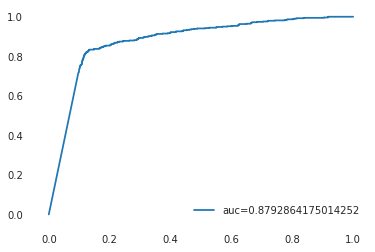

Text(0.5, 257.44, 'Predicted label')

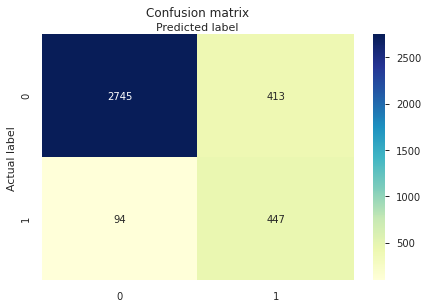

In [30]:

# Create classification report
class_names=[0,1] # name  of classes
print(metrics.classification_report(y_test, y_NB_pred))
print("")

# Compute AUC
y_NB_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_NB_pred_proba)
auc_NB = metrics.roc_auc_score(y_test, y_NB_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc_NB))
plt.legend(loc=4)
plt.show()
print("")

# Create Confusion Matrix/Heatmap
cnf_matrix = metrics.confusion_matrix(y_test, y_NB_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
##Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Conclusion - With an F1 Score of .87, the Naive Bayes model is superior to the base model which had an F1 Score of .71. However, there is still room for improvement.

### 3.2 Decision Tree Model (DT)
>   <b> F1 Score: </b> .86
<br><b> AUC: </b> .73
<br><b> Next Steps: </b> Additional parameter tuning

#### Import Packages

In [31]:
# Load Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

#### Specify/Build the Model

In [32]:
# Create Decision Tree Classifer
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_DT_pred = clf.predict(X_test)

# Print model accuracy (i.e., how often the classifier is correct)
print("Accuracy:",metrics.accuracy_score(y_test, y_DT_pred))

Accuracy: 0.8559070018924033


#### Evaluate the Model

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3158
           1       0.51      0.57      0.53       541

    accuracy                           0.86      3699
   macro avg       0.72      0.74      0.72      3699
weighted avg       0.86      0.86      0.86      3699



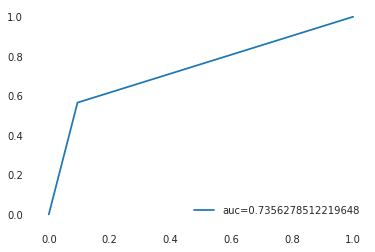

Text(0.5, 257.44, 'Predicted label')

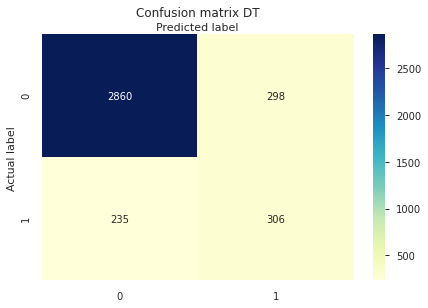

In [33]:
# Create classification report
print(metrics.classification_report(y_test, y_DT_pred))

# Compute AUC
y_DT_pred_proba = clf.predict_proba(X_test)[::,1]
fpr_DT, tpr_DT, _ = metrics.roc_curve(y_test,  y_DT_pred_proba)
auc_DT = metrics.roc_auc_score(y_test, y_DT_pred_proba)
plt.plot(fpr_DT,tpr_DT,label="auc="+str(auc_DT))
plt.legend(loc=4)
plt.show()
print("")

# Print Confusion Matrix/Heatmap
cnf_matrix_DT = metrics.confusion_matrix(y_test, y_DT_pred)
cnf_matrix_DT
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
##Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DT), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix DT', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Conclusion - With an F1 Score of .86, the Decision Tree model is superior to the base model which had an F1 Score of .71. However, there is still room for improvement.

### 3.3 Random Forest Model (RF)
>   <b> F1 Score: </b> .89
<br><b> AUC: </b> .92
<br><b> Next Steps: </b> Additional parameter tuning

#### Import Packages

In [34]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#### Specify/Build Model

In [35]:
# Create a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

y_RF_pred = rfc.predict(X_test)

# Print model accuracy (i.e., how often the classifier is correct)
print("Accuracy:",metrics.accuracy_score(y_test, y_RF_pred))

Accuracy: 0.8969991889699919


#### Evaluate Model

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3158
           1       0.68      0.57      0.62       541

    accuracy                           0.90      3699
   macro avg       0.80      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699



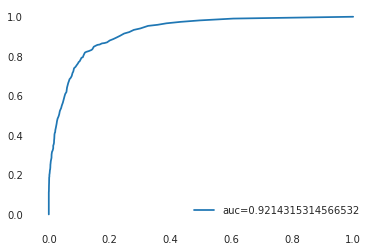

Text(0.5, 257.44, 'Predicted label')

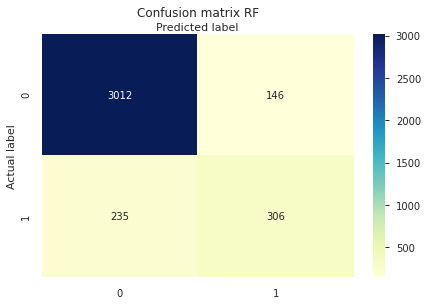

In [36]:
#Create classification report
print(classification_report(y_test, y_RF_pred))

#Compute AUC
y_RF_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr_RF, tpr_RF, _ = metrics.roc_curve(y_test,  y_RF_pred_proba)
auc_RF = metrics.roc_auc_score(y_test, y_RF_pred_proba)
plt.plot(fpr_RF,tpr_RF,label="auc="+str(auc_RF))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix/Heatmap
cnf_matrix_RF = metrics.confusion_matrix(y_test, y_RF_pred)
cnf_matrix_RF
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
##Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RF), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix RF', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Conclusion - With an F1 Score of .89, the Random Forest model is superior to the base model which had an F1 Score of .71. However, there is still room for improvement.

### 3.4 Support Vector Machines (SVM) Classification Model (SVC)
>   <b> F1 Score: </b> .89
<br><b> AUC: </b> .91
<br><b> Next Steps: </b> SVC ensemble classifiers 

#### Import Packages

In [37]:
#Import Support Vector Machines model
from sklearn import svm
svc = svm.SVC(kernel='rbf',cache_size=7000,gamma= 'scale', C=1, probability =True, degree = 3) # gamma= 0.001 , kernel='poly', 'rbf',‘linear’

#### Specify/Build Model

In [38]:
#Specify the Model
svc = svm.SVC(kernel='rbf',cache_size=7000,gamma= 'scale', C=1, probability =True, degree = 3) # gamma= 0.001 , kernel='poly', 'rbf',‘linear’

#Train the model using the training sets
svc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svc = svc.predict(X_test)

# Print model accuracy (i.e., how often the classifier is correct)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svc))

Accuracy: 0.8902406055690727


In [39]:
#### Evaluate the Model

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3158
           1       0.60      0.73      0.66       541

    accuracy                           0.89      3699
   macro avg       0.78      0.82      0.80      3699
weighted avg       0.90      0.89      0.89      3699



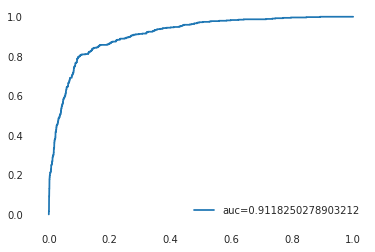

Text(0.5, 257.44, 'Predicted label')

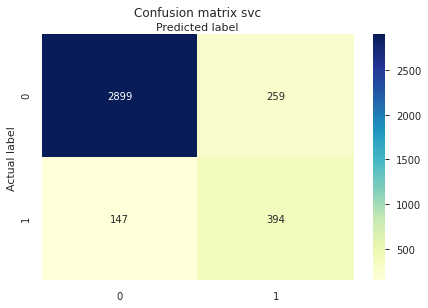

In [40]:
#Create classification report
print(classification_report(y_test, y_pred_svc))

#Compute AUC
y_pred_svc_proba = svc.predict_proba(X_test)[::,1]
fpr_SVM, tpr_SVM, _ = metrics.roc_curve(y_test,  y_pred_svc_proba)
auc_SVM = metrics.roc_auc_score(y_test, y_pred_svc_proba)
plt.plot(fpr_SVM,tpr_SVM,label="auc="+str(auc_SVM))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix/Heatmap
cnf_matrix_svc = metrics.confusion_matrix(y_test, y_pred_svc)
cnf_matrix_svc
class_names_svc=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_svc = np.arange(len(class_names_svc))
plt.xticks(tick_marks_svc, class_names_svc)
plt.yticks(tick_marks_svc, class_names_svc)
##Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix svc', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Conclusion - With an F1 Score of .89, the Support Vector Machines (Classifier) model is superior to the base model which had an F1 Score of .71. However, there is still room for improvement.

### 3.5. XGBoost Model (XGB)
>   <b> F1 Score: </b> .90
<br><b> AUC: </b> .93
<br><b> RMSE: </b> .31
<br><b> Next Steps: </b> Additional parameter tuning


#### Import Packages

In [41]:
#Import Needed Packages
import xgboost as xgb

#### Specify/Build Model

In [42]:
#Instantiate an XGBoost Classifer Model
XGB_class = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

#Put Data into structure for XGBoost
data_dmatrix = xgb.DMatrix(data=X,label=y)

#Train the model
XGB_class.fit(X_train, y_train)

#Predict the response for test dataset
y_XGB_pred = XGB_class.predict(X_test)

# Print model accuracy (i.e., how often the classifier is correct)
print("y Accuracy:",metrics.accuracy_score(y_test, y_XGB_pred))

/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


y Accuracy: 0.9018653690186537


#### Evaluate Model

XGBoost's RMSE is: 0.313264

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3158
           1       0.69      0.60      0.64       541

    accuracy                           0.90      3699
   macro avg       0.81      0.77      0.79      3699
weighted avg       0.90      0.90      0.90      3699



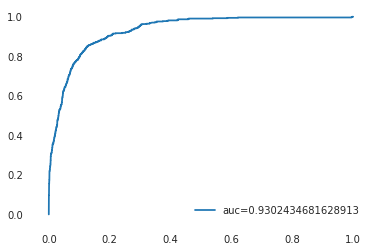

Text(0.5, 257.44, 'Predicted label')

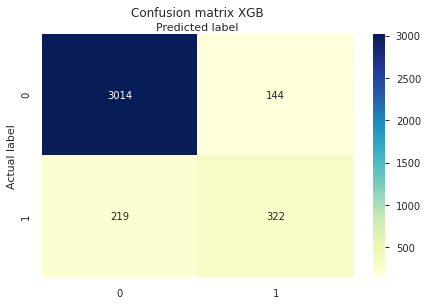

In [43]:
# Calculate RMSE
rmse_XGB = np.sqrt(mean_squared_error(y_test, y_XGB_pred))
print("XGBoost's RMSE is: %f" % (rmse_XGB))
print("")

# Create classification report
print(metrics.classification_report(y_test, y_XGB_pred, labels=class_names))

# Compute AUC
y_XGB_pred_proba = XGB_class.predict_proba(X_test)[::,1]
fpr_XGB, tpr_XGB, _ = metrics.roc_curve(y_test,  y_XGB_pred_proba)
auc_XGB = metrics.roc_auc_score(y_test, y_XGB_pred_proba)
plt.plot(fpr_XGB,tpr_XGB,label="auc="+str(auc_XGB))
plt.legend(loc=4)
plt.show()
print("")

# Print Confusion Matrix/Heatmap
cnf_matrix_XGB = metrics.confusion_matrix(y_test, y_XGB_pred)
cnf_matrix_XGB
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
##Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_XGB), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix XGB', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Conclusion - With an F1 Score of .89, XGBoost is superior to the base model which had an F1 Score of .71. However, there is still room for improvement.

### 3.6 Neural Network Model (NN)
>   <b> F1 Score: </b> .88
<br><b> AUC: </b> .93
<br><b> Next Steps: </b> Additional parameter tuning

#### Import Packages

In [44]:
# Import the model
from sklearn.neural_network import MLPClassifier

#### Specify/Build Model

In [45]:
# Instantiate an multilayer perceptron model
##mlp = MLPClassifier(hidden_layer_sizes = (3,1),solver='sgd',learning_rate_init= 0.01, max_iter=50)
mlp= MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9, 
beta_2=0.999, early_stopping=False, epsilon=1e-08,       
hidden_layer_sizes=(10), learning_rate='adaptive',      
learning_rate_init=0.01, max_iter=10, momentum=0.9,       
nesterovs_momentum=True, power_t=0.5, random_state=1000,       
shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,       
verbose=False, warm_start=True)

# Train the model
mlp.fit(X_train, y_train)

# Predict response for test data
y_pred_nn = mlp.predict(X_test)

# Print model accuracy (i.e., how often the classifier is correct)
print("Accuracy_nn:",metrics.accuracy_score(y_test, y_pred_nn))

# Print MLP Score (score Score takes a feature matrix X_test & the expected target values y_test; Predictions for X_test are compared with y_test)
print("MLP score is",mlp.score(X_test,y_test)) 

Accuracy_nn: 0.8986212489862125
MLP score is 0.8986212489862125


/opt/tljh/user/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# DWM Q - DO WE NEED BOTH "ACCURACY" AND MLP SCORE? AREN'T THEY THE SAME???

#### Evaluate Model

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3158
           1       0.85      0.38      0.52       541

    accuracy                           0.90      3699
   macro avg       0.87      0.68      0.73      3699
weighted avg       0.89      0.90      0.88      3699



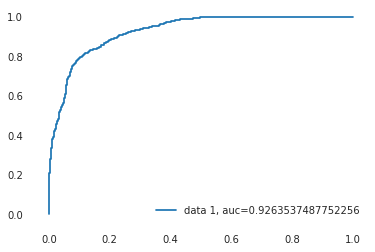

Text(0.5, 257.44, 'Predicted label')

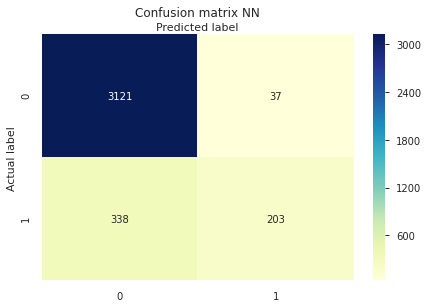

In [46]:
# Create classification report
print(classification_report(y_test, y_pred_nn))

# Compute AUC
y_pred_proba_nn = mlp.predict_proba(X_test)[::,1]
fpr_nn, tpr_nn, _ = metrics.roc_curve(y_test,  y_pred_proba_nn)
auc_nn = metrics.roc_auc_score(y_test, y_pred_proba_nn)
plt.plot(fpr_nn,tpr_nn,label="data 1, auc="+str(auc_nn))
plt.legend(loc=4)
plt.show()
print("")

# Print Confusion Matrix/Heatmap
cnf_matrix_nn = metrics.confusion_matrix(y_test, y_pred_nn)
class_names_nn=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_nn = np.arange(len(class_names_nn))
plt.xticks(tick_marks_nn, class_names_nn)
plt.yticks(tick_marks_nn, class_names_nn)
##Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix NN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Conclusion - With an F1 Score of .88, NN is superior to the base model which had an F1 Score of .71. However, there is still room for improvement.

### 3.7 Logistic Regression Model

>   <b> F1 SCORE: </b> .89
<br><b> AUC: </b> .93
<br><b> Next Steps: </b> Additional parameter tuning


#### Import Packages

In [47]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

#### Specify/Build Model

In [48]:
# Instantiate the model (using the default parameters)
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train,y_train)

# Predict response for test data
y_LR_pred=logreg.predict(X_test)

# Print model accuracy (i.e., how often the classifier is correct)
print("Accuracy:",metrics.accuracy_score(y_test, y_LR_pred))
print("Precision:",metrics.precision_score(y_test, y_LR_pred))
print("Recall:",metrics.recall_score(y_test, y_LR_pred))

Accuracy: 0.8961881589618816
Precision: 0.6632016632016632
Recall: 0.589648798521257


/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Evaluate Model

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3158
           1       0.66      0.59      0.62       541

    accuracy                           0.90      3699
   macro avg       0.80      0.77      0.78      3699
weighted avg       0.89      0.90      0.89      3699



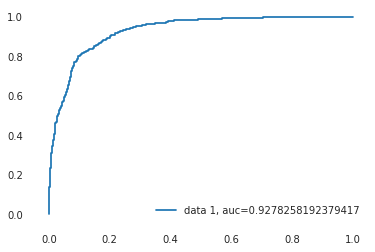

Text(0.5, 257.44, 'Predicted label')

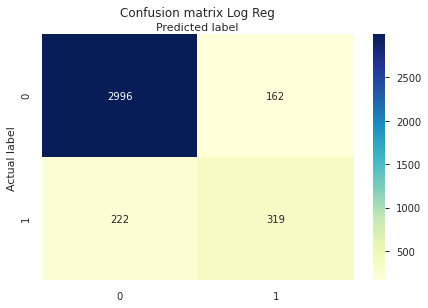

In [49]:
# Create Classification Report
print(classification_report(y_test, y_LR_pred))

# Compute AUC
y_LR_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr_LR, tpr_LR, _ = metrics.roc_curve(y_test,  y_LR_pred_proba)
auc_LR = metrics.roc_auc_score(y_test, y_LR_pred_proba)
plt.plot(fpr_LR,tpr_LR,label="data 1, auc="+str(auc_LR))
plt.legend(loc=4)
plt.show()

# Print the Confusion Matrix/Heatmap
cnf_matrix_LogR = metrics.confusion_matrix(y_test, y_LR_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
##Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_LogR), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Log Reg', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Conclusion - With an F1 Score of .89, Logistic Regression is superior to the base model which had an F1 Score of .71. However, there is still room for improvement.

### Overall Conclusion: all of the post-processing models had higher F1 Scores than the "base model." Hence, processing of the data (imputation, encoding, binning, feature engineering, standardization and normalization) had a positive impact on our modeling. The foregoing post-processing results can be summarized in the following chart:

In [51]:
from sklearn.metrics import f1_score
print("F1 Score - Naive Bayes: ",f1_score(y_test, y_NB_pred, average='weighted'),"                      / AUC - Naive Bayes: ", auc_NB)
print("F1 Score - Decision Tree: ",f1_score(y_test, y_DT_pred, average='weighted'),"                     / AUC - Decision Tree: ", auc_DT)
print("F1 Score - Random Forest: ",f1_score(y_test, y_RF_pred, average='weighted'),"                     / AUC - Random Forest: ", auc_RF)
print("F1 Score - Support Vector Machines Classifier: ",f1_score(y_test, y_pred_svc, average='weighted'),"/ AUC - Support Vector Machines Classifier: ", auc_SVM)
print("F1 Score - XGBoost: ",f1_score(y_test, y_XGB_pred, average='weighted'),"                           / AUC - XGBoost: ", auc_XGB)
print("F1 Score - Neural Network: ",f1_score(y_test, y_pred_nn, average='weighted'),"                    / AUC - Neural Network: ", auc_nn)
print("F1 Score - Logistic Regression: ",f1_score(y_test, y_LR_pred, average='weighted'),"               / AUC - Logistic Regression: ", auc_LR)

F1 Score - Naive Bayes:  0.8748948538791724                       / AUC - Naive Bayes:  0.8792864175014252
F1 Score - Decision Tree:  0.8591452521201032                      / AUC - Decision Tree:  0.7356278512219648
F1 Score - Random Forest:  0.8930989603873057                      / AUC - Random Forest:  0.9214315314566532
F1 Score - Support Vector Machines Classifier:  0.8943977138729957 / AUC - Support Vector Machines Classifier:  0.9118250278903212
F1 Score - XGBoost:  0.8987867189751336                            / AUC - XGBoost:  0.9302434681628913
F1 Score - Neural Network:  0.8813911984581274                     / AUC - Neural Network:  0.9263537487752256
F1 Score - Logistic Regression:  0.8936292943369023                / AUC - Logistic Regression:  0.9278258192379417


### Given the above, it appears as though Naive Bayes and Decision Tree are inferior to the other models. Further model tuning will bear out whether this initial impression holds.